In [1]:
import os
import sys

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt

from load_results import load_cleaned_results

(the spellchecked version v.1 is used, not the verified v.2)

In [2]:
mn_data_fname = "../proc_data_phase0/verification/all_responses_round0-3_verified_entry-level-focus.csv"
df = load_cleaned_results(mn_data_fname)

In [3]:
def nm2domain_map(df):
    return dict(df[["vg_obj_name", "vg_domain"]].values)

nm2domain = nm2domain_map(df)

### A.1: Normalised frequency of MN names (total count normalised by total responses, per image)

In [106]:
mn_name_distr = defaultdict(float)
for (idx, responses) in df[["spellchecked"]].iterrows():
    total_nms = sum(responses["spellchecked"].values())
    
    normalised_responses = [(nm,cnt/total_nms) for (nm,cnt) in responses["spellchecked"].items()]
    for (nm, score) in normalised_responses:
        mn_name_distr[nm] += score

In [107]:
df_mnname_distr = pd.DataFrame(data=mn_name_distr.items(), index=None, columns=["obj_name", "norm_frequ"])
df_mnname_distr.set_index("obj_name", drop=True, inplace=True)
df_mnname_distr.sort_values(by=["norm_frequ"], ascending=False, inplace=True)

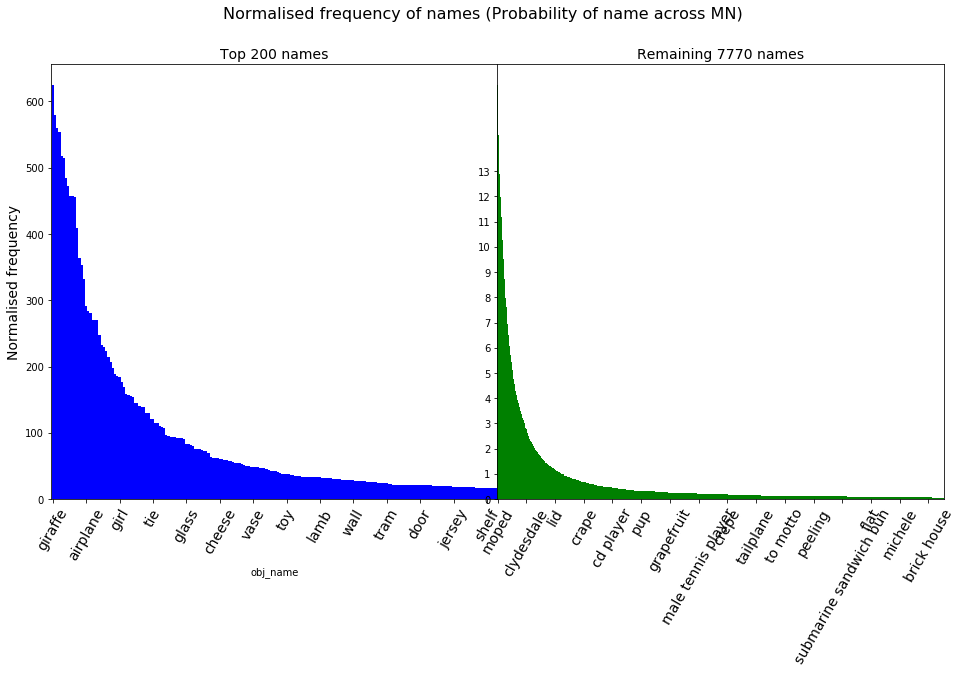

In [113]:
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 8))
fig.subplots_adjust(wspace=0)

no_nms2show = 200

ax = axes[0]
df_mnname_distr.iloc[0:no_nms2show].plot.bar(ax=ax, width=1, color='b', legend=False)
#ax = plt.bar(y_pos, frequs, color=color_list)
inds_nms2show = list(range(0,no_nms2show,15))
nms2show = df_mnname_distr.iloc[0:no_nms2show].index[inds_nms2show]
ax.set_title("Top %d names"%no_nms2show, fontsize=14)
ax.set_xticks(inds_nms2show)
ax.set_xticklabels(nms2show, rotation=60, fontsize=14)

ax.set_ylabel("Normalised frequency", fontsize=14)

if True:
    ax = axes[1]
    df_mnname_distr.iloc[no_nms2show+1:].plot(kind='bar', ax=ax, width=1, color='g', legend=False)
    inds_nms2show = list(range(0,len(df_mnname_distr)-no_nms2show,500))
    nms2show = df_mnname_distr.iloc[no_nms2show+1:].index[inds_nms2show]
    ax.set_xticks(inds_nms2show)
    ax.set_xticklabels(nms2show, rotation=60, fontsize=14)
    ax.set_xlabel("")
    ax.set_yticks(list(range(14)))
    ax.set_title("Remaining %d names"%(len(df_mnname_distr)-no_nms2show), fontsize=14)

fig.suptitle("Normalised frequency of names (Probability of name across MN)", fontsize=16)
plt.show()

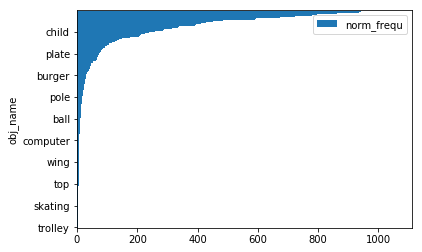

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [15]:
ax = df_mnname_distr.tail(300).plot(kind='barh', width=1)
inds_nms2show = list(range(0,300,30))
nms2show = df_mnname_distr.tail(300).index[inds_nms2show]
ax.set_yticks(inds_nms2show)
ax.set_yticklabels(nms2show, rotation=0)
plt.show()
inds_nms2show

### A.2: Number of objects (images) labeled with a certain name (normalised by #name types of the object)
#### Normalised frequency of MN names (normalised response set: counts sum to 1 per image)
The frequency of word_i is calculated as the sum of normalised occurrences of word_i over all images, where the normalised occurrence of word_i in image j is calulated as 1/#(word_types,j).

In [110]:
mn_name_distr = defaultdict(float)
for (idx, responses) in df[["spellchecked"]].iterrows():
    num_nms = len(responses["spellchecked"].items())
    for nm in responses["spellchecked"].keys():
        mn_name_distr[nm] += (1/num_nms)
        
df_mnname_distr = pd.DataFrame(data=mn_name_distr.items(), index=None, columns=["obj_name", "norm_frequ"])
df_mnname_distr.set_index("obj_name", drop=True, inplace=True)
df_mnname_distr.sort_values(by=["norm_frequ"], ascending=False, inplace=True)

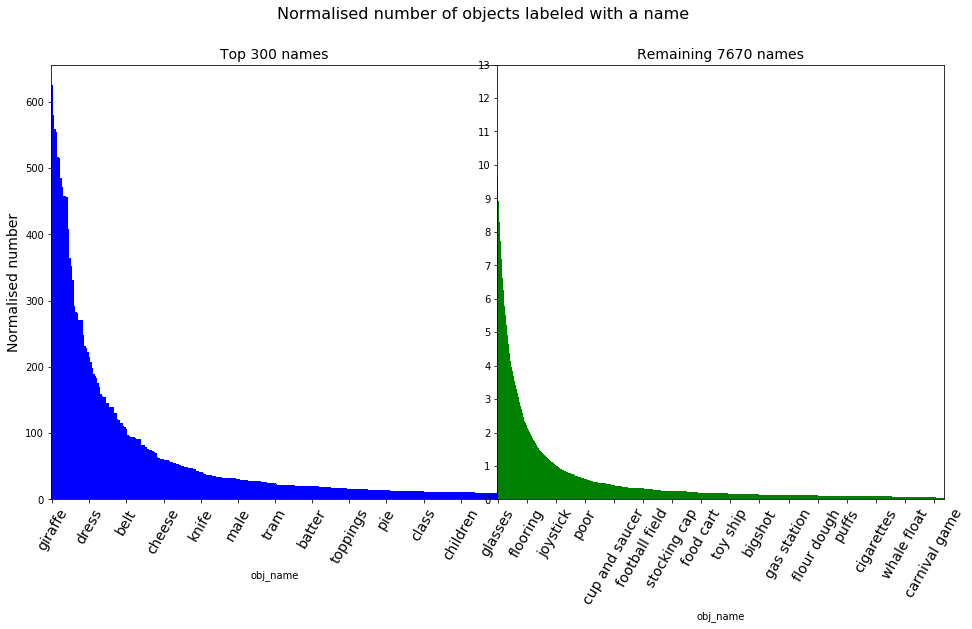

In [112]:
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 8))
fig.subplots_adjust(wspace=0)

no_nms2show = 300

ax = axes[0]
df_mnname_distr.iloc[0:no_nms2show].plot.bar(ax=ax, width=1, color='b', legend=False)
#ax = plt.bar(y_pos, frequs, color=color_list)
inds_nms2show = list(range(0,no_nms2show,25))
nms2show = df_mnname_distr.iloc[0:no_nms2show].index[inds_nms2show]
ax.set_title("Top %d names"%no_nms2show, fontsize=14)
ax.set_xticks(inds_nms2show)
ax.set_xticklabels(nms2show, rotation=60, fontsize=14)

ax.set_ylabel("Normalised number", fontsize=14)

if True:
    ax = axes[1]
    df_mnname_distr.iloc[no_nms2show+1:].plot(kind='bar', ax=ax, width=1, color='g', legend=False)
    inds_nms2show = list(range(0,len(df_mnname_distr)-no_nms2show,500))
    nms2show = df_mnname_distr.iloc[no_nms2show+1:].index[inds_nms2show]
    ax.set_xticks(inds_nms2show)
    ax.set_xticklabels(nms2show, rotation=60, fontsize=14)
    ax.set_yticks(list(range(14)))
    ax.set_title("Remaining %d names"%(len(df_mnname_distr)-no_nms2show), fontsize=14)

fig.suptitle("Normalised number of objects labeled with a name", fontsize=16)
plt.show()

In [33]:
color_list = ['r', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b']

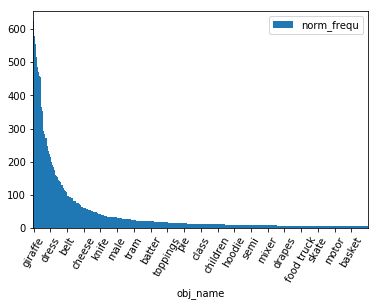

In [20]:
no_nms2show = 500
ax = df_mnname_distr.head(no_nms2show).plot(kind='bar', width=1)
inds_nms2show = list(range(0,no_nms2show,25))
nms2show = df_mnname_distr.head(no_nms2show).index[inds_nms2show]
ax.set_xticks(inds_nms2show)
ax.set_xticklabels(nms2show, rotation=60)
plt.show()

### B.1: VG image distribution, VG name distribution, per domain

In [3]:
def statistics_vg_names(df, print_stats=False):
    # count frequency of vg object names
    obj_name_df = df[["vg_obj_name", "vg_domain"]]
    obj_name_df = pd.DataFrame(obj_name_df.groupby(by=["vg_obj_name", "vg_domain"])["vg_obj_name"].count())
    obj_name_df.rename(columns={"vg_obj_name": "vg_count"}, inplace=True)
    obj_name_df.reset_index(level=[1], inplace=True)
    obj_name_df["vg_obj_name"] = obj_name_df.index
    obj_name_df.set_index(pd.Index(list(range(len(obj_name_df)))), inplace=True)
    obj_name_df.sort_values(by=["vg_domain", "vg_count"], ascending=False, inplace=True)
    
    print_df = dict()
    for cat in set(df.vg_domain):
        top_names = obj_name_df[obj_name_df["vg_domain"]==cat].head(10)["vg_obj_name"].tolist()
        counts_top_names = obj_name_df[obj_name_df["vg_domain"]==cat].head(10)["vg_count"].tolist()
        print_df[cat] = ["%s (%d)" % (top_names[idx], round(counts_top_names[idx])) for idx in range(len(top_names))]
        
    print_df = pd.DataFrame.from_dict(print_df)
    if print_stats:
        print("\n\n**Top 10 VG names for each VG domain**")
        #print(print_df.to_html().replace("\n", ""))
        print(print_df.to_latex())
    
    return obj_name_df, print_df

In [4]:
obj_name_df, print_df = statistics_vg_names(df)

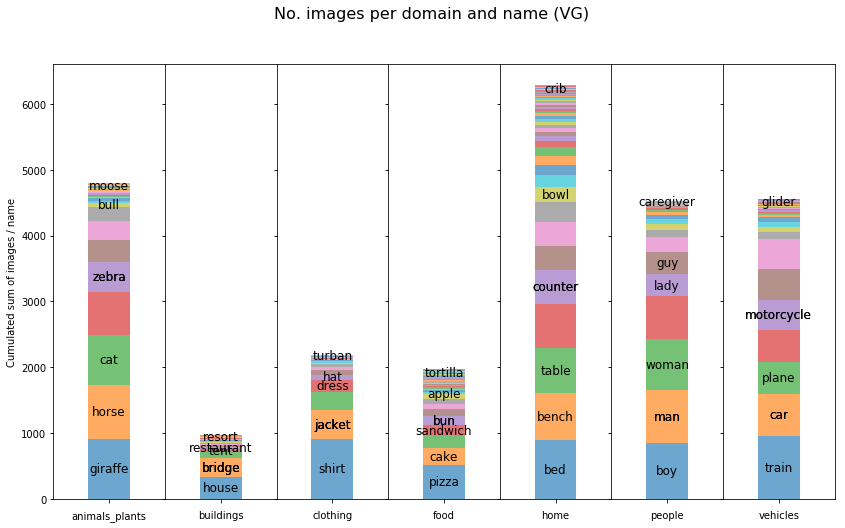

In [110]:
domain_groups = obj_name_df.groupby(['vg_domain']).apply(lambda x: (x.groupby('vg_obj_name')
                                      .sum().sort_values('vg_count', ascending=False)))
domain_gdf = domain_groups.unstack(fill_value=0)
domains = [domain[0] for domain in domain_gdf.iterrows()]

def plot_function(domain, ax):
        num_1domain = domain_gdf.loc[domain][domain_gdf.loc[domain]>0].sort_values(ascending=False)

        a = num_1domain.unstack(fill_value=0)
        plot_singledomain = a.plot(ax=ax, kind="bar", stacked=True, legend=False, alpha=0.65, width=.3)

        # hide x ticks ("vg_count")
        plot_singledomain.xaxis.set_major_formatter(plt.NullFormatter())
        plot_singledomain.set_xlabel(domain)

        #plot_singledomain.yaxis.set_major_locator(plt.NullLocator())
        plot_singledomain.set_ylabel("Cumulated sum of images / name")

        # label some subbars with their names
        ypositions = num_1domain.cumsum()
        #idx2show = [0,1,int(len(ypositions)/30), int(len(ypositions)/20), int(len(ypositions)/10),len(ypositions)-1]
        
        idx2show = [0,1,int(len(ypositions)/30), int(len(ypositions)/20), int(len(ypositions)/10)]
        no_nms2show = 2
        idx2show.extend(list(range(4,
                                   len(ypositions),
                                   int( (len(ypositions))/no_nms2show) )))
        
        if True:
            for idx in idx2show:
                xcoord = int(domains.index(domain)/(len(domains)*2.5))
                if idx == 0:
                    ycoord = int(ypositions[idx]/2)
                else:
                    ycoord = int((ypositions[idx-1]+ypositions[idx])/2) 
                obj_name = a.columns[idx]
                #plot_singledomain.annotate(obj_name,
                    #                (domains.index(domain), ycoord),
                    #                 xytext=(0, 0), 
                    #                 textcoords='offset points')
                ax.text(xcoord, ycoord, 
                        obj_name, ha='center', va='center', 
                        color='black', fontsize=12)
        return plot_singledomain

n_subplots = len(domains)
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(len(domains)*2, 8))  # width, height

graph = dict(zip(domains, axes))
plots = list(map(lambda domain: plot_function(domain, graph[domain]), graph))
fig.suptitle('No. images per domain and name (VG)', fontsize=16)
#ax.tick_params(axis='both', which='both', length=0)
fig.subplots_adjust(wspace=0)

#plt.show()

### B.2: VG image distribution, MN entry-level distribution, per domain

In [9]:
preferred_names = []
mn_domains = []
for (idx, responses) in df[["spellchecked", "vg_domain"]].iterrows():
    top_name = responses["spellchecked"].most_common(1)[0][0]
    vg_domain = responses["vg_domain"]
    preferred_names.append(top_name)
    if top_name not in nm2domain:
        print("not found: ", top_name, vg_domain)
    mn_domains.append(nm2domain.get(top_name, vg_domain))        
        
df["mn_top_name"] = preferred_names
df["mn_domain"] = mn_domains

not found:  toilet home
not found:  hotdog food
not found:  pier buildings
not found:  lettuce food
not found:  sink home
not found:  crust home
not found:  mirror vehicles
not found:  hotdog food
not found:  ram animals_plants
not found:  carrot food
not found:  vest clothing
not found:  faucet clothing
not found:  sink home
not found:  sink home
not found:  glass food
not found:  sink home
not found:  plate food
not found:  hydrant clothing
not found:  marina buildings
not found:  hotdog food
not found:  sink home
not found:  mug home
not found:  mug food
not found:  tractor vehicles
not found:  sink home
not found:  fruit home
not found:  bus vehicles
not found:  plate food
not found:  cape home
not found:  glass home
not found:  couple people
not found:  toilet home
not found:  mirror vehicles
not found:  toy animals_plants
not found:  jersey clothing
not found:  hotdog food
not found:  snowboarder people
not found:  toilet home
not found:  hotdog food
not found:  cookie jar home
n

not found:  skateboard home
not found:  hotdog food
not found:  hotdog food
not found:  wing vehicles
not found:  fruit home
not found:  mug home
not found:  hotdog food
not found:  sink home
not found:  hotdog food
not found:  plant animals_plants
not found:  sink home
not found:  broccoli food
not found:  plate home
not found:  hand people
not found:  broccoli food
not found:  hotdog food
not found:  fruit home
not found:  glass home
not found:  hotdog food
not found:  canopy buildings
not found:  glasses food
not found:  raft vehicles
not found:  snowboarder people
not found:  mirror home
not found:  elephant buildings
not found:  baseball player people
not found:  curtains home
not found:  glass home
not found:  hotdog food
not found:  lettuce food
not found:  door home
not found:  trough home
not found:  tennis player people
not found:  snow people
not found:  baseball player people
not found:  sink home
not found:  glass home
not found:  traffic light home
not found:  statue anim

not found:  sink home
not found:  bus vehicles
not found:  sink home
not found:  sink home
not found:  sink home
not found:  cutting board home
not found:  suitcase home
not found:  propeller vehicles
not found:  sink home
not found:  sink home
not found:  sink home
not found:  bus vehicles
not found:  grass home
not found:  mirror home
not found:  mirror vehicles
not found:  runway vehicles
not found:  sink home
not found:  shelf home
not found:  futon home
not found:  parachute vehicles
not found:  window home
not found:  sink home
not found:  tire vehicles
not found:  box home
not found:  wall home
not found:  sink home
not found:  sink home
not found:  beach home
not found:  sink home
not found:  sink home
not found:  sink home
not found:  sink home
not found:  microwave home
not found:  wall home
not found:  glass home
not found:  wing vehicles
not found:  sausage food
not found:  juicer home
not found:  bear animals_plants
not found:  burger food
not found:  baseball player peopl

In [10]:
def statistics_mn_top_names(df, domain_key, print_stats=False):
    # count frequency of vg object names
    obj_name_df = df[["mn_top_name", domain_key]]
    obj_name_df = pd.DataFrame(obj_name_df.groupby(by=["mn_top_name", domain_key])["mn_top_name"].count())
    obj_name_df.rename(columns={"mn_top_name": "mn_count"}, inplace=True)
    obj_name_df.reset_index(level=[1], inplace=True)
    obj_name_df["mn_top_name"] = obj_name_df.index
    obj_name_df.set_index(pd.Index(list(range(len(obj_name_df)))), inplace=True)
    obj_name_df.sort_values(by=[domain_key, "mn_count"], ascending=False, inplace=True)
    
    print_df = dict()
    for cat in set(df.vg_domain):
        top_names = obj_name_df[obj_name_df[domain_key]==cat].head(10)["mn_top_name"].tolist()
        counts_top_names = obj_name_df[obj_name_df[domain_key]==cat].head(10)["mn_count"].tolist()
        print_df[cat] = ["%s (%d)" % (top_names[idx], round(counts_top_names[idx])) for idx in range(len(top_names))]
        
    print_df = pd.DataFrame.from_dict(print_df)
    if print_stats:
        print("\n\n**Top 10 MN names for each MN/VG domain**")
        #print(print_df.to_html().replace("\n", ""))
        print(print_df.to_latex())
    
    return obj_name_df, print_df

In [11]:
domain_key = "mn_domain" #"vg_domain"
obj_name_df, print_df = statistics_mn_top_names(df, domain_key)

In [12]:
domain_groups = obj_name_df.groupby([domain_key]).apply(lambda x: (x.groupby('mn_top_name')
                                      .sum().sort_values('mn_count', ascending=False)))
domain_gdf = domain_groups.unstack(fill_value=0)
domains = [domain[0] for domain in domain_gdf.iterrows()]

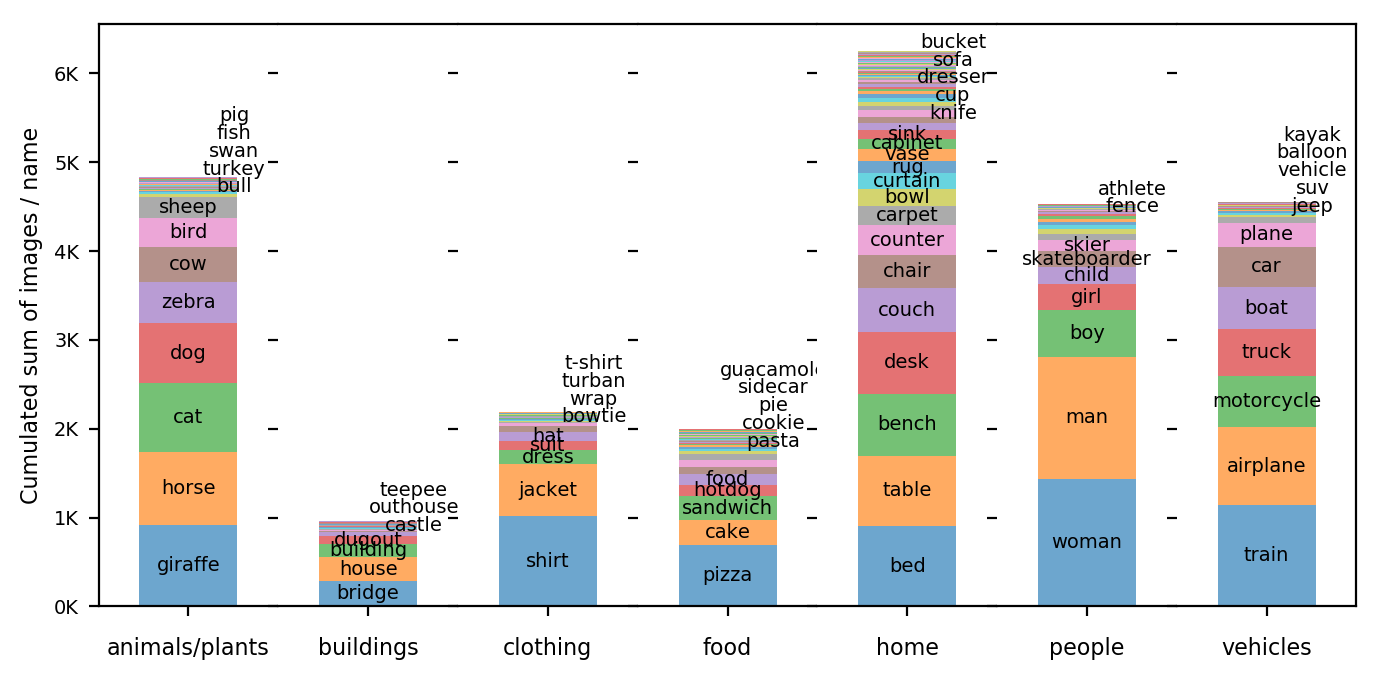

In [21]:
domain_groups = obj_name_df.groupby([domain_key]).apply(lambda x: (x.groupby('mn_top_name')
                                      .sum().sort_values('mn_count', ascending=False)))
domain_gdf = domain_groups.unstack(fill_value=0)
domains = [domain[0] for domain in domain_gdf.iterrows()]


def plot_function(domain, ax):
        text_fontsize = 8
        num_1domain = domain_gdf.loc[domain][domain_gdf.loc[domain]>0].sort_values(ascending=False)

        a = num_1domain.unstack(fill_value=0)
        plot_singledomain = a.plot(ax=ax, kind="bar", stacked=True, legend=False, alpha=0.65, width=.6)

        # hide x ticks ("vg_count")
        plot_singledomain.xaxis.set_major_formatter(plt.NullFormatter())
        plot_singledomain.set_xlabel(domain.replace("_", "/"), fontsize=text_fontsize)

        #plot_singledomain.yaxis.set_major_locator(plt.NullLocator())
        plot_singledomain.set_ylabel("Cumulated sum of images / name", fontsize=text_fontsize)

        # label some subbars with their names
        ypositions = num_1domain.cumsum()
        #idx2show = [0,1,int(len(ypositions)/30), int(len(ypositions)/20), int(len(ypositions)/10),len(ypositions)-1]
        idx2show = [("c",0)]
        for idx in range(1, len(ypositions)):
            if -ypositions[idx-1]+ypositions[idx] < 90:
                break
            idx2show.append(("c", idx))
        #idx2show.extend([("l", int(len(ypositions)/30)), ("l",int(len(ypositions)/20)), ("l",int(len(ypositions)/10))])
        no_nms2show = 5
        num = 0
        for idx in list(range(16, len(ypositions),3)):
            obj_name = a.columns[idx]
            mn_domain = nm2domain.get(obj_name, "")
            if mn_domain != domain:
                continue
            idx2show.append(("r",idx))
            num += 1
            if num >= no_nms2show:
                break
        #idx2show.extend([("r",idx) for idx in list(range(17, len(ypositions),
        #                                                 int( (len(ypositions))/no_nms2show )))])
        if True:
            adj_ycoord = 0
            for (pos,idx) in idx2show:
                if idx == 0:
                    ycoord = int(ypositions[idx]/2)
                else:
                    ycoord = int((ypositions[idx-1]+ypositions[idx])/2) 
                if pos=="r":
                    xcoord = int(domains.index(domain)/(len(domains)*2.5))+.28
                    if adj_ycoord > 0:
                        ycoord = adj_ycoord
                        adj_ycoord += 200
                    else:
                        adj_ycoord = ycoord + 200
                else:
                    xcoord = int(domains.index(domain)/(len(domains)*2.5))
                obj_name = a.columns[idx]
                #plot_singledomain.annotate(obj_name,
                    #                (domains.index(domain), ycoord),
                    #                 xytext=(0, 0), 
                    #                 textcoords='offset points')
                ax.text(xcoord, ycoord, 
                        obj_name, ha='center', va='center', 
                        color='black', fontsize=text_fontsize-1)
            if domain!="animals_plants":
                ax.spines['left'].set_visible(False)
                #plot_singledomain.yaxis.grid(False)
            else:
                mkfunc = lambda x, pos: '%1.0fK' % (x / 1000)
                mkformatter = plt.FuncFormatter(mkfunc)
                plot_singledomain.yaxis.set_major_formatter(mkformatter)
                plot_singledomain.tick_params(labelsize=text_fontsize-1)
                
            if domain!="vehicles":
                ax.spines['right'].set_visible(False)
        return plot_singledomain

n_subplots = len(domains)
#fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(len(domains)*2, 8))  # width, height
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(7, 3.5), dpi=200)  # width, height

graph = dict(zip(domains, axes))
plots = list(map(lambda domain: plot_function(domain, graph[domain]), graph))
#fig.suptitle('No. images per domain and name (VG)', fontsize=16)
#ax.tick_params(axis='both', which='both', length=0)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
#fig.patch.set_visible(False)
#plt.savefig(os.path.join("..", "papers", "LREC2020", "figures", "distr_imgs-per-domain_VGMN.png"))
plt.savefig(os.path.join("distr_imgs-per-domain_VGMN"))
#plt.show()